**Getting a different perspective on heirarchical models with the 8 schools dataset**

What is the impact of having a heirarchical model on the coefficients of other predictor variables.


In [1]:
import arviz as az
from datetime import timedelta
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
import pandas as pd
import pymc3 as pm
import scipy.stats as stats
import seaborn as sns
from scipy.special import expit, logit
from scipy.optimize import curve_fit
import statsmodels.api as sm
import daft
from causalgraphicalmodels import CausalGraphicalModel
%matplotlib inline

In [2]:
%load_ext nb_black
%config InlineBackend.figure_format = 'retina'
%load_ext watermark
RANDOM_SEED = 8927
np.random.seed(RANDOM_SEED)
az.style.use("arviz-darkgrid")
az.rcParams["stats.hdi_prob"] = 0.95  # sets default credible interval used by arviz

sns.set_context("talk")

def standardize(x):
    x = (x - np.mean(x)) / np.std(x)
    return x

<IPython.core.display.Javascript object>

# Approach

- get dataset, see if it's available online
- mimic another post with deeper exploration
- add other lessons from the book

# Data with only the intercept, no repeat observations

A ridiculous looking DAG.

/Users/blacar/opt/anaconda3/envs/stats_rethinking/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  fig.canvas.print_figure(bytes_io, **kw)


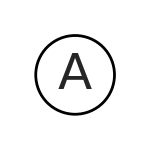

<IPython.core.display.Javascript object>

In [3]:
dag = CausalGraphicalModel(
    nodes=["A"],
    edges=[],
)
pgm = daft.PGM()
coordinates = {
    "A": (0, 1),
}
for node in dag.dag.nodes:
    pgm.add_node(node, node, *coordinates[node])
for edge in dag.dag.edges:
    pgm.add_edge(*edge)

pgm.render()


In [61]:
%watermark -n -u -v -iv -w

Last updated: Fri Apr 08 2022

Python implementation: CPython
Python version       : 3.8.6
IPython version      : 7.20.0

scipy      : 1.6.0
statsmodels: 0.12.2
arviz      : 0.11.1
sys        : 3.8.6 | packaged by conda-forge | (default, Jan 25 2021, 23:22:12) 
[Clang 11.0.1 ]
pandas     : 1.2.1
matplotlib : 3.3.4
seaborn    : 0.11.1
daft       : 0.1.0
pymc3      : 3.11.0
numpy      : 1.20.1

Watermark: 2.1.0



<IPython.core.display.Javascript object>